# **Applied Machine Learning Homework 5**
**Due 12 Dec,2022 (Monday) 11:59PM EST**

### Natural Language Processing
We will train a supervised model to predict if a movie has a positive or a negative review.

Name Aaron Zhao
uni: sz2940

####  **Dataset loading & dev/test splits**

**1.0) Load the movie reviews dataset from NLTK library**

In [74]:
import nltk
nltk.download("movie_reviews")
import pandas as pd
from nltk.corpus import twitter_samples 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/imac/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/imac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/imac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

pos_document = [(' '.join(movie_reviews.words(file_id)),category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id) if category == 'pos']
neg_document = [(' '.join(movie_reviews.words(file_id)),category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id) if category == 'neg']

# List of postive and negative reviews
pos_list = [pos[0] for pos in pos_document]
neg_list = [neg[0] for neg in neg_document]

**1.1) Make a data frame that has reviews and its label**

In [76]:
import pandas as pd 

pos_list_df = pd.DataFrame(pos_list, columns = ['Reviews'])
pos_list_df['label'] = '1'

neg_list_df = pd.DataFrame(neg_list, columns = ['Reviews'])
neg_list_df['label'] = '0'

review_df_frame = [pos_list_df, neg_list_df]
review_df = pd.concat(review_df_frame,ignore_index=True,)

**1.2 look at the class distribution of the movie reviews**

In [77]:
review_df['label'].value_counts()

1    1000
0    1000
Name: label, dtype: int64

**1.3) Create a development & test split (80/20 ratio):**

In [261]:
from sklearn.model_selection import train_test_split

df_X_dev, df_X_test, df_y_dev, df_y_test = \
train_test_split(review_df['Reviews'] , review_df['label'], test_size = 0.2)

#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You may use `re` package for this. 

**1.4) Replace the `#` symbol with '' in every review**

In [262]:
import re

# df_X_dev
print('Processing df_X_dev')
list_of_row_contains_hashtag = df_X_dev.index[df_X_dev.str.contains('#') == True].tolist()
print('List before replacing #:',list_of_row_contains_hashtag)

df_X_dev = df_X_dev.str.replace('\#', '', regex=True)

check = df_X_dev.index[df_X_dev.str.contains('#') == True].tolist()
print('List after replacing #:',check)


# df_X_test
print('\nProcessing df_X_test')
list_of_row_contains_hashtag = df_X_test.index[df_X_test.str.contains('#') == True].tolist()
print('List before replacing #:',list_of_row_contains_hashtag)

df_X_test = df_X_test.str.replace('\#', '', regex=True)

check = df_X_test.index[df_X_test.str.contains('#') == True].tolist()
print('List after replacing #:',check)



Processing df_X_dev
List before replacing #: [1539, 328, 1819, 1916, 1970, 1384, 1730, 590, 442, 1693, 1511, 115, 934, 353, 735, 628, 1027, 1431, 37, 581, 701, 1690, 1831, 1645, 1087, 620, 466, 1016, 862, 1419, 812, 1136, 1517]
List after replacing #: []

Processing df_X_test
List before replacing #: [432, 1942, 674, 1244, 1882, 1896, 1133, 146, 773, 529, 1353, 240]
List after replacing #: []


**1.5) Replace hyperlinks with '' in every review**

In [263]:
# df_X_dev
print('Processing df_X_dev')
list_of_row_contains_hyperlinks = df_X_dev.index[df_X_dev.str.contains('http') == True].tolist()
print('List before replacing http:', list_of_row_contains_hyperlinks)

df_X_dev = df_X_dev.str.replace(r'(\s*https? : \/\/ (\S*) \. (\S*)( \/ (\S+))* )',
                                '', regex = True).str.strip()

check = df_X_dev.index[df_X_dev.str.contains('http') == True].tolist()
print('List after replacing http:', check)

# df_X_test
print('\nProcessing df_X_test')
list_of_row_contains_hyperlinks = df_X_test.index[df_X_test.str.contains('http') == True].tolist()
print('List before replacing http:', list_of_row_contains_hyperlinks)

df_X_test = df_X_test.str.replace(r'(\s*https? : \/\/ (\S*) \. (\S*)( \/ (\S+))* )',
                                  '', regex = True).str.strip()

check = df_X_test.index[df_X_test.str.contains('http') == True].tolist()
print('List after replacing http:', check)

Processing df_X_dev
List before replacing http: [455, 860, 82, 945, 1536, 1510, 220]
List after replacing http: []

Processing df_X_test
List before replacing http: [953, 1488]
List after replacing http: []


**1.6) Remove all stop words**

In [264]:
from nltk.corpus import stopwords

stops = stopwords.words("english")

stops = '|'.join("%s%s%s"%('\\b',p,'\\b') for p in stops)
print('stop words: ', stops)

# df_X_dev
print('Processing df_X_dev')

list_of_row_contains_stopword = df_X_dev.index[df_X_dev.str.contains(stops) == True].tolist()
print('List before replacing stop words:', len(list_of_row_contains_stopword))

df_X_dev = df_X_dev.str.replace(r'\b' + stops, ' ', regex = True)

check = df_X_dev.index[df_X_dev.str.contains(stops) == True].tolist()
print('List after replacing stop words:', len(check))

# df_X_test
print('\nProcessing df_X_test')
list_of_row_contains_stopword = df_X_test.index[df_X_test.str.contains(stops) == True].tolist()
print('List before replacing stop words:', len(list_of_row_contains_stopword))

df_X_test = df_X_test.str.replace(r'\b' + stops, ' ', regex = True)

check = df_X_test.index[df_X_test.str.contains(stops) == True].tolist()
print('List after replacing stop words:', len(check))

stop words:  \bi\b|\bme\b|\bmy\b|\bmyself\b|\bwe\b|\bour\b|\bours\b|\bourselves\b|\byou\b|\byou're\b|\byou've\b|\byou'll\b|\byou'd\b|\byour\b|\byours\b|\byourself\b|\byourselves\b|\bhe\b|\bhim\b|\bhis\b|\bhimself\b|\bshe\b|\bshe's\b|\bher\b|\bhers\b|\bherself\b|\bit\b|\bit's\b|\bits\b|\bitself\b|\bthey\b|\bthem\b|\btheir\b|\btheirs\b|\bthemselves\b|\bwhat\b|\bwhich\b|\bwho\b|\bwhom\b|\bthis\b|\bthat\b|\bthat'll\b|\bthese\b|\bthose\b|\bam\b|\bis\b|\bare\b|\bwas\b|\bwere\b|\bbe\b|\bbeen\b|\bbeing\b|\bhave\b|\bhas\b|\bhad\b|\bhaving\b|\bdo\b|\bdoes\b|\bdid\b|\bdoing\b|\ba\b|\ban\b|\bthe\b|\band\b|\bbut\b|\bif\b|\bor\b|\bbecause\b|\bas\b|\buntil\b|\bwhile\b|\bof\b|\bat\b|\bby\b|\bfor\b|\bwith\b|\babout\b|\bagainst\b|\bbetween\b|\binto\b|\bthrough\b|\bduring\b|\bbefore\b|\bafter\b|\babove\b|\bbelow\b|\bto\b|\bfrom\b|\bup\b|\bdown\b|\bin\b|\bout\b|\bon\b|\boff\b|\bover\b|\bunder\b|\bagain\b|\bfurther\b|\bthen\b|\bonce\b|\bhere\b|\bthere\b|\bwhen\b|\bwhere\b|\bwhy\b|\bhow\b|\ball\b|\bany\b|\b

**1.7) Remove all punctuations**

In [265]:
# df_X_dev
print('Processing df_X_dev')

list_of_row_contains_punctuation = df_X_dev.index[df_X_dev.str.contains('[^\w\s]') == True].tolist()
print('List before replacing punctuation:', len(list_of_row_contains_punctuation))

df_X_dev = df_X_dev.str.replace('[^\w\s]', '', regex = True).str.strip()

check = df_X_dev.index[df_X_dev.str.contains('[^\w\s]') == True].tolist()
print('List after replacing punctuation:', len(check))

# df_X_test
print('\nProcessing df_X_test')

list_of_row_contains_punctuation = df_X_test.index[df_X_test.str.contains('[^\w\s]') == True].tolist()
print('List before replacing punctuation:', len(list_of_row_contains_punctuation))

df_X_test = df_X_test.str.replace('[^\w\s]', '', regex = True).str.strip()

check = df_X_test.index[df_X_test.str.contains('[^\w\s]') == True].tolist()
print('List after replacing punctuation:', len(check))

Processing df_X_dev
List before replacing punctuation: 1600
List after replacing punctuation: 0

Processing df_X_test
List before replacing punctuation: 400
List after replacing punctuation: 0


**1.8) Apply stemming on the development & test datasets using Porter algorithm**

In [266]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[porter.stem(word) for word in token_words]
    return " ".join(stem_sentence)

porter = PorterStemmer()
df_X_dev = [stemSentence(review) for review in df_X_dev]

print('dev done processing')
df_X_test = [stemSentence(review) for review in df_X_test]
print('test done processing')

dev done processing
test done processing


#### **Model training**

**1.9) Create bag of words features for each review in the development dataset**

In [279]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()
X_dev_bow = counter.fit_transform(df_X_dev)
X_test_bow = counter.transform(df_X_test)

**1.10) Train a Logistic Regression model on the development dataset**

In [280]:
from sklearn.linear_model import LogisticRegressionCV
lr_bow = LogisticRegressionCV().fit(X_dev_bow,df_y_dev)
lr_bow.score(X_test_bow,df_y_test)

0.8625

**1.11) Create TF-IDF features for each review in the development dataset**

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X_dev_tf = tfidf.fit_transform(df_X_dev)
X_test_tf = tfidf.transform(df_X_test)

**1.12) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [282]:
lr_tf = LogisticRegressionCV().fit(X_dev_tf,df_y_dev)
lr_tf.score(X_test_tf,df_y_test)

0.865

**1.13) Compare the performance of the two models on the test dataset. Explain the difference in results obtained?**

Accuracy of Bag of Word Model : 0.8625
Accuracy of TFIDF Model : 0.865


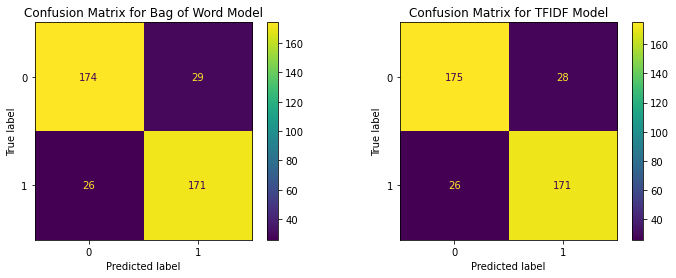

In [283]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ConfusionMatrixDisplay.from_estimator(lr_bow, X_test_bow,df_y_test, ax = ax[0])
ax[0].set_title('Confusion Matrix for Bag of Word Model')
ConfusionMatrixDisplay.from_estimator(lr_tf, X_test_tf,df_y_test, ax = ax[1])
ax[1].set_title('Confusion Matrix for TFIDF Model')
print("Accuracy of Bag of Word Model : {}".format(lr_bow.score(X_test_bow,df_y_test)))
print("Accuracy of TFIDF Model : {}".format(lr_tf.score(X_test_tf,df_y_test)))

From the confusion matrices, the outcomes are almost the same but the tf-idf has a slighty better prediction